# PCA

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

# Load dataset
data = load_wine()
df = pd.DataFrame(data['data'], columns=data['feature_names'])
df['wine_type'] = data['target']
df.head()

In [ ]:
plt.figure(figsize=(6,4))
palette = ["red", "blue", "green"]
sns.scatterplot(x=df['alcohol'], y=df['malic_acid'], hue=data.target, palette=palette)
plt.title("Original Wine Dataset (First 2 Features)")
plt.show()

In [23]:
# Standardize the dataset
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.iloc[:, :-1])


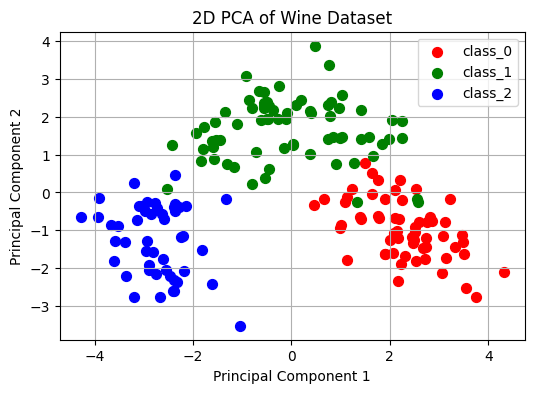

In [24]:
# Apply PCA
pca = PCA(n_components=2)  # Reduce data to 2 components
principal_components = pca.fit_transform(scaled_data)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
principal_df['wine_type'] = df['wine_type']

# Visualize the data in 2D plot
colors = ['r', 'g', 'b']
targets = [0, 1, 2]
plt.figure(figsize=(6,4))
for target, color in zip(targets, colors):
    indices_to_keep = principal_df['wine_type'] == target
    plt.scatter(principal_df.loc[indices_to_keep, 'PC1'], principal_df.loc[indices_to_keep, 'PC2'], c=color, s=50)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA of Wine Dataset')
plt.legend(data['target_names'])
plt.grid()
plt.show()

# Leverage points

Model with Mansions:
Intercept: -225040.03
House Size Coefficient: 114.5881



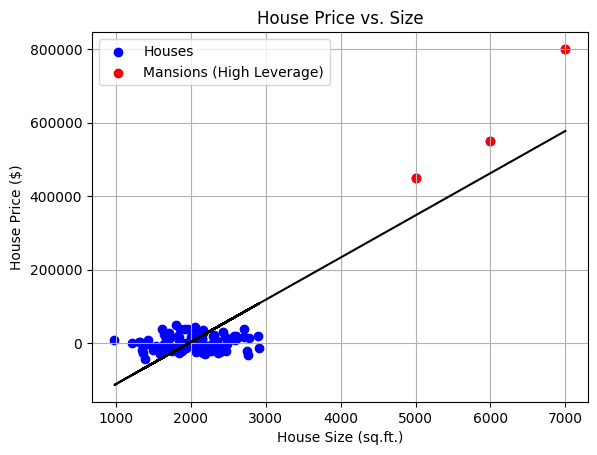

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Generate synthetic data
np.random.seed(0)
house_size = np.random.normal(2000, 400, 100)  # average house around 2000 sq.ft.
house_price = 100 + 0.5 * house_size + np.random.normal(0, 20000, 100)

# Add a few mansions
house_size = np.append(house_size, [5000, 6000, 7000])
house_price = np.append(house_price, [450000, 550000, 800000])  # not necessarily following the previous linear trend

# Fit a linear regression model
X = sm.add_constant(house_size)
model = sm.OLS(house_price, X).fit()

# Printing parameters for the model with mansions
print("Model with Mansions:")
print(f"Intercept: {model.params[0]:.2f}")
print(f"House Size Coefficient: {model.params[1]:.4f}\n")

# Plot the data and the regression line
plt.scatter(house_size, house_price, color='blue', label='Houses')
plt.scatter(house_size[-3:], house_price[-3:], color='red', label='Mansions (High Leverage)')
plt.plot(house_size, model.params[0] + model.params[1] * house_size, color='black')
plt.title('House Price vs. Size')
plt.xlabel('House Size (sq.ft.)')
plt.ylabel('House Price ($)')
plt.legend()
plt.grid(True)
plt.show()


Model without Mansions:
Intercept: -9866.78
House Size Coefficient: 6.2349


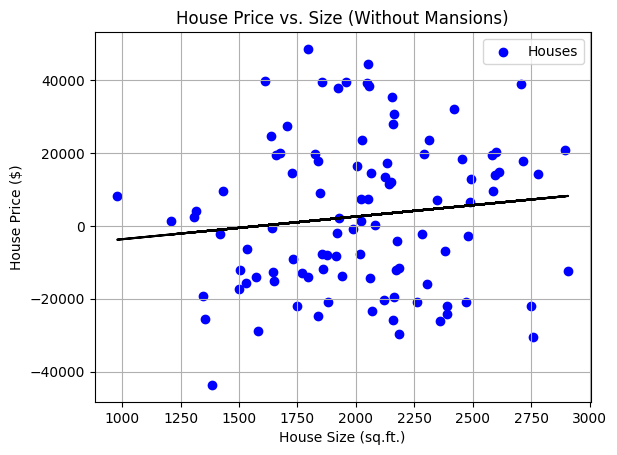

In [26]:
# Generate synthetic data (without the mansions)
np.random.seed(0)
house_size = np.random.normal(2000, 400, 100)  # average house around 2000 sq.ft.
house_price = 100 + 0.5 * house_size + np.random.normal(0, 20000, 100)

# Fit a linear regression model
X = sm.add_constant(house_size)
model_without_mansions = sm.OLS(house_price, X).fit()

# Printing parameters for the model without mansions
print("Model without Mansions:")
print(f"Intercept: {model_without_mansions.params[0]:.2f}")
print(f"House Size Coefficient: {model_without_mansions.params[1]:.4f}")

# Plot the data and the regression line
plt.scatter(house_size, house_price, color='blue', label='Houses')
plt.plot(house_size, model_without_mansions.params[0] + model_without_mansions.params[1] * house_size, color='black')
plt.title('House Price vs. Size (Without Mansions)')
plt.xlabel('House Size (sq.ft.)')
plt.ylabel('House Price ($)')
plt.legend()
plt.grid(True)
plt.show()
